# Loading Libraries

In [6]:
pip install wordcloud
#Below Library is not omported
#pip install graphviz

SyntaxError: invalid syntax (899945106.py, line 2)

In [7]:
import requests  ## for getting data from a server GET
import re   ## for regular expressions
import pandas as pd    ## for dataframes and related
from pandas import DataFrame

## To tokenize and vectorize text type data
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
## For word clouds
## conda install -c conda-forge wordcloud
## May also have to run conda update --all on cmd
#import PIL
#import Pillow
#import wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
import random as rd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
#from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
## conda install python-graphviz
## restart kernel (click the little red x next to the Console)
#import graphviz  ##Couldn't load the library

from sklearn.decomposition import LatentDirichletAllocation 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import silhouette_samples, silhouette_score
import sklearn
from sklearn.cluster import KMeans

from sklearn import preprocessing

import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

# Running Query to get Data from API

Preparing List of 5 wealthiest People and creating blank CSV with column names

In [8]:
##Preparing List of 5 Wealthiest People
topics=["Elon Musk", "Jeff Bezos", "Bill Gates", "Larry Ellison", "Warren Buffett"]  

##Creating blank CSV File to store the Headline data
## first adding the column names
filename="NewHeadlines.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()


Getting the Data in JSON from API and storing at local CSV

In [13]:
##Generating the URL

endpoint="https://newsapi.org/v2/everything"

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey':'6bccf08b26964d66bd5ee5332ba446b8',
               'q':topic
    }

    response=requests.get(endpoint, URLPost)
    print(response)
    jsontxt = response.json()
    print(jsontxt)
    MyFILE=open(filename, "a")
    LABEL=topic
    for items in jsontxt["articles"]:
        print(items, "\n\n\n")
                  
        #Author=items["author"]
        #Author=str(Author)
        #Author=Author.replace(',', '')
        
        Source=items["source"]["name"]
        print(Source)
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        print(Date)
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        print(Title)
        print(Headline)
        
        WriteThis=str(LABEL)+","+str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
        print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    ## CLOSE THE FILE
    MyFILE.close()

<Response [200]>
{'status': 'ok', 'totalResults': 15292, 'articles': [{'source': {'id': 'wired', 'name': 'Wired'}, 'author': 'Jeff Link', 'title': 'Tesla’s Problems Go Way Beyond Elon Musk', 'description': 'The EV giant is alienating its customers, bringing in less revenue, and falling behind legacy carmakers.', 'url': 'https://www.wired.com/story/teslas-problems-elon-musk-twitter/', 'urlToImage': 'https://media.wired.com/photos/63cb0d4dcfa271f239ae7ce4/191:100/w_1280,c_limit/Biz-tesla-sad-1246089361.jpg', 'publishedAt': '2023-01-23T12:00:00Z', 'content': 'A Plante Moran analysis shared with WIRED shows Teslas share of the North American EV market declining from 70 percent in 2022 to just 31 percent by 2025, as total EV production grows from 777,000 to… [+3259 chars]'}, {'source': {'id': 'engadget', 'name': 'Engadget'}, 'author': 'Mariella Moon', 'title': "Elon Musk defends 'funding secured' tweets in Tesla shareholder trial", 'description': 'Elon Musk said that just because he tweets 

Elon Musk could take SpaceX s Starlink business public in to give him a ton of more dry powder Chamath Palihapitiya says
Starlink this year would much earlier than expected Elon Musk said public offering least three four years away
Elon Musk,2023-01-09,Business Insider,Elon Musk could take SpaceX s Starlink business public in to give him a ton of more dry powder Chamath Palihapitiya says,Starlink this year would much earlier than expected Elon Musk said public offering least three four years away

{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'gkay@insider.com (Grace Kay)', 'title': "Tesla investor and former 'fanboy' questions whether Elon Musk is purposely tanking the carmaker's stock", 'description': "Earlier this year, Elon Musk became the first person to ever lose $200 billion in net worth. His fortune dropped in large part due to Tesla's stock.", 'url': 'https://www.businessinsider.com/tesla-investor-leo-koguan-accuses-elon-musk-tanking-stock-price-

<Response [200]>
{'status': 'ok', 'totalResults': 1526, 'articles': [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'ekim@businessinsider.com (Eugene Kim)', 'title': "Amazon CEO Andy Jassy just joined the company's earnings call for the first time ever and shared 4 of his top priorities: 'Each era is different'", 'description': "There's been recent chatter internally about founder Jeff Bezos potentially returning as CEO, after Amazon's stock plunged in 2022.", 'url': 'https://www.businessinsider.com/amazon-ceo-andy-jassy-joins-earnings-call-first-time-priorities-2023-2', 'urlToImage': 'https://i.insider.com/62583c3a1ab402001927b411?width=1200&format=jpeg', 'publishedAt': '2023-02-03T00:21:20Z', 'content': "Amazon CEO Andy Jassy made his first ever appearance on the company's earnings call on Thursday and shared the 4 areas he's most focused on.\r\nUnlike most other companies, Amazon's earnings calls are … [+2818 chars]"}, {'source': {'id': None, 'name': 'E

{'source': {'id': None, 'name': 'Biztoc.com'}, 'author': 'inc.com', 'title': 'Jeff Bezos used metaphors, an ancient communication tool, to explain complex ideas', 'description': 'Metaphors are mental shortcuts to explain complex ideas.', 'url': 'https://biztoc.com/x/1f8ffed9c6aad784', 'urlToImage': 'https://c.biztoc.com/p/1f8ffed9c6aad784/og.webp', 'publishedAt': '2023-01-18T22:26:14Z', 'content': 'Metaphors are mental shortcuts to explain complex ideas. \r\n This story appeared on inc.com, 2023-01-18.'} 



Biztoc.com
2023-01-18
Jeff Bezos used metaphors an ancient communication tool to explain complex ideas
Jeff Bezos used metaphors an ancient communication tool to explain complex ideas
Metaphors mental shortcuts explain complex ideas
Jeff Bezos,2023-01-18,Biztoc.com,Jeff Bezos used metaphors an ancient communication tool to explain complex ideas,Metaphors mental shortcuts explain complex ideas

{'source': {'id': None, 'name': 'Biztoc.com'}, 'author': 'cnn.com', 'title': 'The Washing

<Response [200]>
{'status': 'ok', 'totalResults': 2134, 'articles': [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'bnolan@insider.com (Beatrice Nolan)', 'title': "Bill Gates says he was surprised at being targeted by COVID-19 conspiracy theorists and 'people were looking for a boogeyman'", 'description': 'Bill Gates has poured billions into researching, developing, and delivering vaccines through the Bill and Melinda Gates Foundation.', 'url': 'https://www.businessinsider.com/bill-gates-covid-19-theories-boogeyman-2023-2', 'urlToImage': 'https://i.insider.com/63dd01090a08ae0018a69f2b?width=1200&format=jpeg', 'publishedAt': '2023-02-03T13:14:44Z', 'content': 'Bill Gates said he was surprised by some COVID-19 conspiracy theories about him and thinks people were "looking for a boogeyman."\r\n"During the pandemic, there were tens of millions of messages that I… [+1363 chars]'}, {'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': 'Reuters Fact Check', 

<Response [200]>
{'status': 'ok', 'totalResults': 283, 'articles': [{'source': {'id': 'business-insider', 'name': 'Business Insider'}, 'author': 'bnguyen@insider.com (Britney Nguyen)', 'title': "Billionaire Larry Ellison gets speeding ticket on island he owns while driving Corvette, told cop there's 'no excuse'", 'description': "Larry Ellison was pulled over for running through a stop sign and speeding in his orange Corvette on Lana'i, the Hawaiian island of which he owns 98%.", 'url': 'https://www.businessinsider.com/billionaire-larry-ellison-gets-speeding-ticket-hawaii-island-he-owns-2023-1', 'urlToImage': 'https://i.insider.com/63c16c3333ffb700180f978f?width=1200&format=jpeg', 'publishedAt': '2023-01-13T15:48:08Z', 'content': "Billionaire Larry Ellison was caught running a stop sign and speeding on the Hawaiian island of Lana'i, of which he owns nearly 98%.\r\nThe Oracle cofounder was stopped while driving his orange Corvett… [+1831 chars]"}, {'source': {'id': 'bbc-news', 'name': 'B

<Response [200]>
{'status': 'ok', 'totalResults': 1094, 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': None, 'title': 'Breakingviews - Jeff Smith makes for a substitute Warren Buffett - Reuters', 'description': 'Warren Buffett has his aw-shucks act down pat. And the Sage of Omaha has monetized that image to great effect, sweeping into situations to support companies in a tight spot with his cash and his implicit seal of approval while getting a plum deal that no othe…', 'url': 'https://www.reuters.com/breakingviews/jeff-smith-makes-substitute-warren-buffett-2023-01-30/', 'urlToImage': 'https://www.reuters.com/resizer/1gBYwNHdiFHH6dnAJzei1WHo3dk=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/DQPCF7LTDNJGHBHL3NDCALPWI4.jpg', 'publishedAt': '2023-01-30T19:28:00Z', 'content': 'NEW YORK, Jan 30 (Reuters Breakingviews) - Warren Buffett has his aw-shucks act down pat. And the Sage of Omaha has monetized that image to great ef

Converting to a DataFrame

In [30]:
BBC_DF=pd.read_csv("NewHeadlines.csv", error_bad_lines=False, encoding='latin-1') ##Added latin-1 as error was coming in previous code
print(BBC_DF.head())
# iterating the columns 
for col in BBC_DF.columns: 
    print(col) 
    
print(BBC_DF["Headline"])

## REMOVE any rows with NaN in them
BBC_DF = BBC_DF.dropna()
print(BBC_DF["Headline"])

### Tokenize and Vectorize the Headlines
## Create the list of headlines
## Keep the labels!

HeadlineLIST=[]
LabelLIST=[]

for nexthead, nextlabel in zip(BBC_DF["Headline"], BBC_DF["LABEL"]):
    HeadlineLIST.append(nexthead)
    LabelLIST.append(nextlabel)

print("The headline list is:\n")
print(HeadlineLIST)

print("The label list is:\n")
print(LabelLIST)


       LABEL        Date       Source  \
0  Elon Musk  2023-01-23        Wired   
1  Elon Musk  2023-01-21     Engadget   
2  Elon Musk  2023-02-03     Engadget   
3  Elon Musk  2023-01-07  Gizmodo.com   
4  Elon Musk  2023-01-24     Engadget   

                                               Title  \
0           Tesla s Problems Go Way Beyond Elon Musk   
1  Elon Musk defends funding secured tweets in Te...   
2  Jury rules Elon Musk is not liable for shareho...   
3  Times Elon Musk Replied Lovingly to Elon Musk ...   
4  Elon Musk says his SpaceX shares would ve fund...   

                                            Headline  
0  giant alienating customers bringing less reven...  
1  Elon Musk said that just because tweets someth...  
2  Elon Musk hook tweets claiming funding secured...  
3  Twitter Elon Musk continues bamboozle world so...  
4  Elon Musk said could sold SpaceX shares take T...  
LABEL
Date
Source
Title
Headline
0      giant alienating customers bringing less reven

C:\Users\jeetp\AppData\Local\Temp\ipykernel_6076\4018028210.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  BBC_DF=pd.read_csv("NewHeadlines.csv", error_bad_lines=False, encoding='latin-1')


Removing the words that matches topic

In [31]:
##########################################
## Remove all words that match the topics.
## For example, if the topics are food and covid
## remove these exact words.
##
## We will need to do this by hand. 
NewHeadlineLIST=[]

for element in HeadlineLIST:
    print(element)
    print(type(element))
    ## make into list
    AllWords=element.split(" ")
    print(AllWords)
    
    ## Now remove words that are in your topics
    NewWordsList=[]
    for word in AllWords:
        print(word)
        word=word.lower()
        if word in topics:
            print(word)
        else:
            NewWordsList.append(word)
            
    ##turn back to string
    NewWords=" ".join(NewWordsList)
    ## Place into NewHeadlineLIST
    NewHeadlineLIST.append(NewWords)


##
## Set the     HeadlineLIST to the new one
HeadlineLIST=NewHeadlineLIST
print(HeadlineLIST)     

giant alienating customers bringing less revenue falling behind legacy carmakers
<class 'str'>
['giant', 'alienating', 'customers', 'bringing', 'less', 'revenue', 'falling', 'behind', 'legacy', 'carmakers']
giant
alienating
customers
bringing
less
revenue
falling
behind
legacy
carmakers
Elon Musk said that just because tweets something does mean people believe will accordingly Tesla chief took witness stand Francisco federal court defend himself tweets made back lawsuit
<class 'str'>
['Elon', 'Musk', 'said', 'that', 'just', 'because', 'tweets', 'something', 'does', 'mean', 'people', 'believe', 'will', 'accordingly', 'Tesla', 'chief', 'took', 'witness', 'stand', 'Francisco', 'federal', 'court', 'defend', 'himself', 'tweets', 'made', 'back', 'lawsuit']
Elon
Musk
said
that
just
because
tweets
something
does
mean
people
believe
will
accordingly
Tesla
chief
took
witness
stand
Francisco
federal
court
defend
himself
tweets
made
back
lawsuit
Elon Musk hook tweets claiming funding secured take 

your
business
Elon Musk social media company been hemorrhaging dollars
<class 'str'>
['Elon', 'Musk', 'social', 'media', 'company', 'been', 'hemorrhaging', 'dollars']
Elon
Musk
social
media
company
been
hemorrhaging
dollars
board chair Tesla href https reuters companies TSLA target blank TSLA defended Elon Musk securities fraud trial Friday telling jurors that would have quit director thought Musk lied
<class 'str'>
['board', 'chair', 'Tesla', 'href', 'https', 'reuters', 'companies', 'TSLA', 'target', 'blank', 'TSLA', 'defended', 'Elon', 'Musk', 'securities', 'fraud', 'trial', 'Friday', 'telling', 'jurors', 'that', 'would', 'have', 'quit', 'director', 'thought', 'Musk', 'lied']
board
chair
Tesla
href
https
reuters
companies
TSLA
target
blank
TSLA
defended
Elon
Musk
securities
fraud
trial
Friday
telling
jurors
that
would
have
quit
director
thought
Musk
lied
Tesla href https reuters companies TSLA target blank TSLA Chief Executive Elon Musk Biden administration officials Friday Washingto

returning
after
Amazon
stock
plunged
Bezos supposedly circling purchase Washington Commanders franchise
<class 'str'>
['Bezos', 'supposedly', 'circling', 'purchase', 'Washington', 'Commanders', 'franchise']
Bezos
supposedly
circling
purchase
Washington
Commanders
franchise
first interview since relationship with billionaire Jeff Bezos became public nchez said flying helps feel entirely control
<class 'str'>
['first', 'interview', 'since', 'relationship', 'with', 'billionaire', 'Jeff', 'Bezos', 'became', 'public', 'nchez', 'said', 'flying', 'helps', 'feel', 'entirely', 'control']
first
interview
since
relationship
with
billionaire
Jeff
Bezos
became
public
nchez
said
flying
helps
feel
entirely
control
nchez former journalist collaborates with philanthropy bringing girl gang space
<class 'str'>
['nchez', 'former', 'journalist', 'collaborates', 'with', 'philanthropy', 'bringing', 'girl', 'gang', 'space']
nchez
former
journalist
collaborates
with
philanthropy
bringing
girl
gang
space
wonder

retomar
puesto
para
solventar
ltiples
problemas
tiene
actualmente
sobre
mesa
compa
entrada
Regresar
Jeff
Bezos
para
enderezar
rumbo
barco
deriva
Amazon
NASA will send spacecraft metal world samples from asteroid will dropped Earth Artemis astronauts will selected several commercial rockets could make their launch debut
<class 'str'>
['NASA', 'will', 'send', 'spacecraft', 'metal', 'world', 'samples', 'from', 'asteroid', 'will', 'dropped', 'Earth', 'Artemis', 'astronauts', 'will', 'selected', 'several', 'commercial', 'rockets', 'could', 'make', 'their', 'launch', 'debut']
NASA
will
send
spacecraft
metal
world
samples
from
asteroid
will
dropped
Earth
Artemis
astronauts
will
selected
several
commercial
rockets
could
make
their
launch
debut
Depuis Jeff Bezos obsession currente effectuer livraisons tentaculaire entreprise drones
<class 'str'>
['Depuis', 'Jeff', 'Bezos', 'obsession', 'currente', 'effectuer', 'livraisons', 'tentaculaire', 'entreprise', 'drones']
Depuis
Jeff
Bezos
obsession
cur

Thursday
meeting
with
executive
editor
Sally
Buzbee
publisher
Fred
Ryan
York
Times
reports
Bezos
left
Post
employee
wearing
shirt
emblazoned
with
Metaphors mental shortcuts explain complex ideas
<class 'str'>
['Metaphors', 'mental', 'shortcuts', 'explain', 'complex', 'ideas']
Metaphors
mental
shortcuts
explain
complex
ideas
Washington Post sale spokespeople newspaper owner Jeff Bezos told Monday They denied York Post report which cited unnamed sources suggesting billionaire could shed newspaper help fund potential purc
<class 'str'>
['Washington', 'Post', 'sale', 'spokespeople', 'newspaper', 'owner', 'Jeff', 'Bezos', 'told', 'Monday', 'They', 'denied', 'York', 'Post', 'report', 'which', 'cited', 'unnamed', 'sources', 'suggesting', 'billionaire', 'could', 'shed', 'newspaper', 'help', 'fund', 'potential', 'purc']
Washington
Post
sale
spokespeople
newspaper
owner
Jeff
Bezos
told
Monday
They
denied
York
Post
report
which
cited
unnamed
sources
suggesting
billionaire
could
shed
newspaper
hel

['Bill', 'Gates', 'fundadores', 'Microsoft', 'sistema', 'operativo', 'Windows', 'reconocido', 'predicciones', 'aciertos', 'mundo', 'rodea', 'marcado', 'tecnolog', 'gran', 'especialidad', 'Hace', 'unos', 'daba', 'unas', 'pautas']
Bill
Gates
fundadores
Microsoft
sistema
operativo
Windows
reconocido
predicciones
aciertos
mundo
rodea
marcado
tecnolog
gran
especialidad
Hace
unos
daba
unas
pautas
Bill Gates persona suele bastante activa redes Recientemente vimos expresar predicciones para trav blog personal siendo tradici tras embargo muchos despu ajetreada vida vinculada
<class 'str'>
['Bill', 'Gates', 'persona', 'suele', 'bastante', 'activa', 'redes', 'Recientemente', 'vimos', 'expresar', 'predicciones', 'para', 'trav', 'blog', 'personal', 'siendo', 'tradici', 'tras', 'embargo', 'muchos', 'despu', 'ajetreada', 'vida', 'vinculada']
Bill
Gates
persona
suele
bastante
activa
redes
Recientemente
vimos
expresar
predicciones
para
trav
blog
personal
siendo
tradici
tras
embargo
muchos
despu
ajetrea

empresa
Bill
Gates
Pues
tiene
creados
forma
autom
tica
inteligencia
Artificial
curr
culos
famosos
diversas
reas
vida
profes
During recent Reddit Microsoft founder Bill Gates poured cold water crypto dampening hopes those expect these technologies become next thing Responding user question about whether there mammoth techno
<class 'str'>
['During', 'recent', 'Reddit', 'Microsoft', 'founder', 'Bill', 'Gates', 'poured', 'cold', 'water', 'crypto', 'dampening', 'hopes', 'those', 'expect', 'these', 'technologies', 'become', 'next', 'thing', 'Responding', 'user', 'question', 'about', 'whether', 'there', 'mammoth', 'techno']
During
recent
Reddit
Microsoft
founder
Bill
Gates
poured
cold
water
crypto
dampening
hopes
those
expect
these
technologies
become
next
thing
Responding
user
question
about
whether
there
mammoth
techno
Milch Fleischersatz rden unser Leben umkrempeln Jetzt stagnieren Verkaufszahlen fallen Kurse
<class 'str'>
['Milch', 'Fleischersatz', 'rden', 'unser', 'Leben', 'umkrempeln', 

Could
Cost
Billions
More
Third
column
story
link
Related
stories
Musk
Appetite
Destruction
Hate
speech
rises
TWITTER
after
takeover
Taliban
buying
blue
checks
Qatar
Elon
back
Despite inflation general economic downturn seven properties still crossed million line mega mansions sold ticket
<class 'str'>
['Despite', 'inflation', 'general', 'economic', 'downturn', 'seven', 'properties', 'still', 'crossed', 'million', 'line', 'mega', 'mansions', 'sold', 'ticket']
Despite
inflation
general
economic
downturn
seven
properties
still
crossed
million
line
mega
mansions
sold
ticket
These companies raining down revenue from cloud computing
<class 'str'>
['These', 'companies', 'raining', 'down', 'revenue', 'from', 'cloud', 'computing']
These
companies
raining
down
revenue
from
cloud
computing
Buenas Fino Acabo darme cuenta vivimos Matrix Larry Ellison fundador Oracle realmente Oscar Puente alcalde Valladolid Coincidencia creo Angel verdad parecido sobresaliente post completo Parecidos
<class 'str'>


King
Long before beleaguered billionaire Elon Musk purchased Twitter October sights Tesla electric automaker where serves from which derives most wealth fame
<class 'str'>
['Long', 'before', 'beleaguered', 'billionaire', 'Elon', 'Musk', 'purchased', 'Twitter', 'October', 'sights', 'Tesla', 'electric', 'automaker', 'where', 'serves', 'from', 'which', 'derives', 'most', 'wealth', 'fame']
Long
before
beleaguered
billionaire
Elon
Musk
purchased
Twitter
October
sights
Tesla
electric
automaker
where
serves
from
which
derives
most
wealth
fame
Opening statements begin trial that will determine whether Tesla Elon Musk cheated investors asserting tweets that lined financing take electric automaker private
<class 'str'>
['Opening', 'statements', 'begin', 'trial', 'that', 'will', 'determine', 'whether', 'Tesla', 'Elon', 'Musk', 'cheated', 'investors', 'asserting', 'tweets', 'that', 'lined', 'financing', 'take', 'electric', 'automaker', 'private']
Opening
statements
begin
trial
that
will
determine


<class 'str'>
['name', 'floated', 'potential', 'head', 'social', 'media', 'platform', 'Here', 'what', 'were', 'suddenly', 'chargeElon', 'Musk', 'aren', 'exactly', 'friends', 'back', 'quite', 'years', 'early', 'when', 'public', 'editor', 'kind', 'ombuds']
name
floated
potential
head
social
media
platform
Here
what
were
suddenly
chargeElon
Musk
aren
exactly
friends
back
quite
years
early
when
public
editor
kind
ombuds
have heard that highly productive people wake miles attain enlightenment before sunrise that always true Rather they come
<class 'str'>
['have', 'heard', 'that', 'highly', 'productive', 'people', 'wake', 'miles', 'attain', 'enlightenment', 'before', 'sunrise', 'that', 'always', 'true', 'Rather', 'they', 'come']
have
heard
that
highly
productive
people
wake
miles
attain
enlightenment
before
sunrise
that
always
true
Rather
they
come
These Buffett stocks look like bargain want miss
<class 'str'>
['These', 'Buffett', 'stocks', 'look', 'like', 'bargain', 'want', 'miss']
These
Bu

<class 'str'>
['Want', 'invest', 'like', 'Buffett', 'Buying', 'this', 'stock', 'brainer']
Want
invest
like
Buffett
Buying
this
stock
brainer
['giant alienating customers bringing less revenue falling behind legacy carmakers', 'elon musk said that just because tweets something does mean people believe will accordingly tesla chief took witness stand francisco federal court defend himself tweets made back lawsuit', 'elon musk hook tweets claiming funding secured take tesla private share jury found that musk liable tesla investors losses following weeks long trial francisco verdict major', 'twitter elon musk continues bamboozle world some might wondering what hell thinking this person went from being time person year being first person ever lose billion personal worth from', 'elon musk said could sold spacex shares take tesla private when took witness stand again defend funding secured tweets lawsuit filed automaker shareholders according cnbc musk proclaimed spacex stock alon', 'twitter e

Building the labeled  Dataframe

In [32]:
### Vectorize
## Instantiate your CV
MyCountV=CountVectorizer(
        input="content",  ## because we have a csv file
        lowercase=True, 
        stop_words = "english",
        max_features=50
        )

## Use your CV 
MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))


ColumnNames=MyCountV.get_feature_names()
#print(type(ColumnNames))


## Build the data frame
MyDTM_DF=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

## Convert the labels from list to df
Labels_DF = DataFrame(LabelLIST,columns=['LABEL'])

## Check your new DF and you new Labels df:
print("Labels\n")
print(Labels_DF)
print("News df\n")
print(MyDTM_DF.iloc[:,0:6])

##Save original DF - without the lables
My_Orig_DF=MyDTM_DF
print(My_Orig_DF)
######################
## AND - just to make sure our dataframe is fair
## let's remove columns called:
## food, bitcoin, and sports (as these are label names)
######################
#MyDTM_DF=MyDTM_DF.drop(topics, axis=1)


## Now - let's create a complete and labeled
## dataframe:
dfs = [Labels_DF, MyDTM_DF]
print(dfs)

Final_News_DF_Labeled = pd.concat(dfs,axis=1, join='inner')
## DF with labels
print(Final_News_DF_Labeled)

<class 'scipy.sparse.csr.csr_matrix'>
Labels

              LABEL
0         Elon Musk
1         Elon Musk
2         Elon Musk
3         Elon Musk
4         Elon Musk
..              ...
490  Warren Buffett
491  Warren Buffett
492  Warren Buffett
493  Warren Buffett
494  Warren Buffett

[495 rows x 1 columns]
News df

     adani  amazon  berkshire  bezos  billionaire  buffett
0        0       0          0      0            0        0
1        0       0          0      0            0        0
2        0       0          0      0            0        0
3        0       0          0      0            0        0
4        0       0          0      0            0        0
..     ...     ...        ...    ...          ...      ...
490      0       0          0      0            0        1
491      0       0          0      0            0        1
492      0       0          0      0            0        1
493      0       0          0      0            0        0
494      0       0          0   

C:\Users\jeetp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Visualizations

        LABEL  adani  amazon  berkshire  bezos  billionaire  buffett  buying  \
0   Elon Musk      0       0          0      0            0        0       0   
1   Elon Musk      0       0          0      0            0        0       0   
2   Elon Musk      0       0          0      0            0        0       0   
3   Elon Musk      0       0          0      0            0        0       0   
4   Elon Musk      0       0          0      0            0        0       0   
..        ...    ...     ...        ...    ...          ...      ...     ...   
95  Elon Musk      0       0          0      0            0        0       0   
96  Elon Musk      0       0          0      0            0        0       0   
97  Elon Musk      0       0          0      0            1        0       0   
98  Elon Musk      0       0          0      0            0        0       0   
99  Elon Musk      0       0          0      0            0        0       0   

    companies  company  ...  tesla  tol

              LABEL  adani  amazon  berkshire  bezos  billionaire  buffett  \
395  Warren Buffett      0       0          0      0            0        1   
396  Warren Buffett      0       0          0      0            0        1   
397  Warren Buffett      0       0          0      0            0        1   
398  Warren Buffett      0       0          0      0            0        1   
399  Warren Buffett      0       0          0      0            0        1   
..              ...    ...     ...        ...    ...          ...      ...   
490  Warren Buffett      0       0          0      0            0        1   
491  Warren Buffett      0       0          0      0            0        1   
492  Warren Buffett      0       0          0      0            0        1   
493  Warren Buffett      0       0          0      0            0        0   
494  Warren Buffett      0       0          0      0            0        1   

     buying  companies  company  ...  tesla  told  trial  tsla 

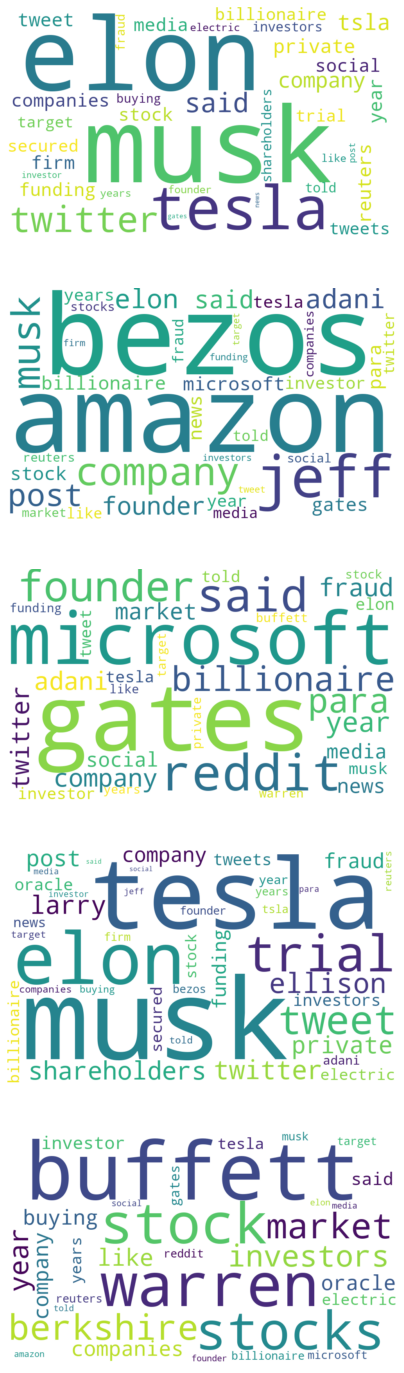

In [33]:
List_of_WC=[]

for mytopic in topics:

    tempdf = Final_News_DF_Labeled[Final_News_DF_Labeled['LABEL'] == mytopic]
    print(tempdf)
    
    tempdf =tempdf.sum(axis=0,numeric_only=True)
    #print(tempdf)
    
    #Make var name
    NextVarName=str("wc"+str(mytopic))
    #print( NextVarName)
    
    ##In the same folder as this code, I have three images
    ## They are called: food.jpg, bitcoin.jpg, and sports.jpg
    #next_image=str(str(mytopic) + ".jpg")
    #print(next_image)
    
    ## https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html
    
    ###########
    ## Create and store in a list the wordcloud OBJECTS
    #########
    NextVarName = WordCloud(width=1000, height=600, background_color="white",
                   min_word_length=4, #mask=next_image,
                   max_words=200).generate_from_frequencies(tempdf)
    
    ## Here, this list holds all three wordclouds I am building
    List_of_WC.append(NextVarName)
    

##------------------------------------------------------------------
print(List_of_WC)
##########
########## Create the wordclouds
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)
NumTopics=len(topics)
for i in range(NumTopics):
    print(i)
    ax = fig.add_subplot(NumTopics,1,i+1)
    plt.imshow(List_of_WC[i], interpolation='bilinear')
    plt.axis("off")
    plt.savefig("NewClouds.pdf")
 
    
 